## Лабораторная работа №1 | Вариант 5

Выполнил: Чернаткин А.С. М8О-301Б-22

### 1. Numpy

In [138]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [139]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [140]:
rgba = np.dtype([
    ('r', np.uint8),
    ('g', np.uint8),
    ('b', np.uint8),
    ('a', np.uint8)
])

violet = np.array((127, 0, 255, 255), dtype=rgba) #Определили фиолетовый цвет

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [141]:
np.seterr(all='ignore') # Игнорирует все арифметические ошибки, такие как деление на ноль, переполнение, недополнение, invalid операции

import warnings
warnings.filterwarnings('ignore', module='numpy') # Отключает любые предупреждения, возникающие из numpy

4. Создайте случайный вектор размера 10 и отсортируйте его

In [142]:
rnd = np.random.rand(10)
rnd = np.sort(rnd)
print(rnd)

[0.04414523 0.09141205 0.12126507 0.36949592 0.44544485 0.46433375
 0.61797991 0.66597347 0.79752374 0.93187619]


5. Создайте read-only массив(неизменяемый)

In [143]:
read_only_array = np.array([1, 2, 3, 4])
read_only_array.flags.writeable = False
# read_only_array[10] = 0 # Проверка

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [144]:
matrix = np.random.rand(10, 2)
print(matrix)
for elem in matrix:
    x = elem[0]
    y = elem[1]
    elem[0] = np.sqrt(x * x + y * y) # Координата X в декартовой заменяется на радиус R в полярной
    elem[1] = np.arctan(y / x) # Координата Y в декартовой заменяется на угол phi в полярной
print('\n')
print(matrix)

[[0.66841988 0.94363993]
 [0.94737519 0.34868286]
 [0.46975744 0.21466642]
 [0.07932447 0.41018525]
 [0.42852333 0.85060116]
 [0.68195632 0.5833392 ]
 [0.52084128 0.65234784]
 [0.64467949 0.68512716]
 [0.39984273 0.30446995]
 [0.98103425 0.90261201]]


[[1.15639157 0.95449355]
 [1.00950457 0.35266496]
 [0.51648207 0.42863744]
 [0.41778501 1.37976748]
 [0.95244663 1.10412228]
 [0.89741241 0.70761542]
 [0.83476544 0.89702542]
 [0.94075017 0.81580499]
 [0.50256956 0.65080429]
 [1.33309289 0.74378899]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [145]:
dtype = np.dtype([('x', np.float64), ('y', np.float64)])

n_dots = 5 # Количество точек по каждой оси

x = np.linspace(0, 1, n_dots)
y = np.linspace(0, 1, n_dots)

x_grid, y_grid = np.meshgrid(x, y, indexing='ij')

structured_array = np.zeros(x_grid.shape, dtype=dtype)

structured_array['x'] = x_grid
structured_array['y'] = y_grid

print(structured_array)

[[(0.  , 0.  ) (0.  , 0.25) (0.  , 0.5 ) (0.  , 0.75) (0.  , 1.  )]
 [(0.25, 0.  ) (0.25, 0.25) (0.25, 0.5 ) (0.25, 0.75) (0.25, 1.  )]
 [(0.5 , 0.  ) (0.5 , 0.25) (0.5 , 0.5 ) (0.5 , 0.75) (0.5 , 1.  )]
 [(0.75, 0.  ) (0.75, 0.25) (0.75, 0.5 ) (0.75, 0.75) (0.75, 1.  )]
 [(1.  , 0.  ) (1.  , 0.25) (1.  , 0.5 ) (1.  , 0.75) (1.  , 1.  )]]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)


In [146]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
print(x)
print(y)
print('\n')

C = 1 / (x [:, np.newaxis] - y)

print(C)

[ 2.0077184  -0.05008754  0.25224341 -0.12910645 -0.17133691]
[0.59371816 0.52372143 0.23919143 0.05958337 0.23189032]


[[ 0.70721346  0.67385583  0.56544232  0.51331144  0.56311758]
 [-1.55326367 -1.74274027 -3.45687073 -9.11818817 -3.54637767]
 [-2.92847423 -3.68353944 76.61672383  5.19048998 49.13260016]
 [-1.38346148 -1.53179732 -2.71519349 -5.29970297 -2.77010786]
 [-1.30709545 -1.43872815 -2.43588543 -4.33049879 -2.47999121]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [147]:
float_array = np.array([1.6, 3.7, 8.2, 9.4], dtype=np.float32)
print(float_array, '\n')


float_array = float_array.astype(np.int32, copy=False)
print(float_array)

[1.6 3.7 8.2 9.4] 

[1 3 8 9]


10. Как случайно заменить p элементов в 2D массиве?

In [148]:
array = np.arange(1, 17).reshape(4, 4)  # Создаем 2D массив со значениями от 1 до 16

p = int(input()) # Количество значений, которые нужно заменить

rows, cols = array.shape # Определяем кол-во строк и столбцов в массиве

indexes = np.random.choice(rows * cols, p, replace=False)

row_indexes, col_indexes = np.unravel_index(indexes, (rows, cols)) # Преобразуем индексы из одномерных в двумерные

array[row_indexes, col_indexes] = 0

print(array)


[[ 0  2  3  4]
 [ 5  6  7  0]
 [ 9  0 11 12]
 [13 14 15  0]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [149]:
import pandas as pd

In [150]:
# Load dataset here
data = pd.read_csv("data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Узнайте сколько было на борту человек

In [151]:
passangers_number = data.shape[0]

print(passangers_number)

891


2. Какой медианный и средний возраста пассажиров

In [152]:
median_age = data["Age"].median()
mean_age = data["Age"].mean()

print(median_age)
print(mean_age)

28.0
29.69911764705882


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [153]:
# Первый способ
children_survived = data[(data["Age"] < 16) & (data["Survived"] == 1)].shape[0] / data[(data["Age"] < 16)].shape[0] * 100
adults_survived = data[(data["Age"] >= 16) & (data["Survived"] == 1)].shape[0] / data[(data["Age"] >= 16)].shape[0] * 100

print(children_survived)
print(adults_survived, '\n')

# Второй способ
children_survived = data[data["Age"] < 16]["Survived"].mean() * 100
adults_survived = data[data["Age"] >= 16]["Survived"].mean() * 100

print(children_survived)
print(adults_survived)

59.036144578313255
38.193343898573694 

59.036144578313255
38.193343898573694


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [154]:
women_survived = data[(data['Age'] >= 16) & (data['Sex'] == 'female')]['Survived'].mean() * 100
men_survived = data[(data['Age'] >= 16) & (data['Sex'] == 'male')]['Survived'].mean() * 100

print(women_survived)
print(men_survived)
print(children_survived)

# Гипотеза верна, так как процент выживаемости женщин и детей выше процента выживаемости мужчин 

77.52293577981652
17.433414043583532
59.036144578313255


5. Зависит ли выживаемость от класса обслуживания?

In [155]:
print(data['Pclass'].value_counts(), '\n')

first_class_survived = data[data['Pclass'] == 1]['Survived'].mean() * 100
second_class_survived = data[data['Pclass'] == 2]['Survived'].mean() * 100
third_class_survived = data[data['Pclass'] == 3]['Survived'].mean() * 100

print(first_class_survived)
print(second_class_survived)
print(third_class_survived)

# Да, зависит, чем лучше класс обслуживания, тем больше выживаемость - людей с первым классом выжило в процентном соотношении больше, чем людей с другими классами


Pclass
3    491
1    216
2    184
Name: count, dtype: int64 

62.96296296296296
47.28260869565217
24.236252545824847


6. Посчитайте средний возраст умерших женщин и мужчин

In [156]:
women_dead_age = data[(data['Survived'] == 0) & (data['Sex'] == 'female')]['Age'].mean()
men_dead_age = data[(data['Survived'] == 0) & (data['Sex'] == 'male')]['Age'].mean()

print(women_dead_age)
print(men_dead_age)

25.046875
31.618055555555557


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [157]:
not_alone_passangers_survived = data[(data['SibSp'] == 1) | (data['Parch'] == 1)]['Survived'].mean() * 100
alone_passangers_survived = data[(data['SibSp'] == 0) & (data['Parch'] == 0)]['Survived'].mean() * 100

print(not_alone_passangers_survived)
print(alone_passangers_survived)

# Да, различается, выживаемость пассажиров с хотя бы одним родственником выше.

52.96296296296297
30.353817504655495


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [158]:
ticket_cost_dead_passengers = data[data['Survived'] == 0]['Fare'].mean()
ticket_cost_survived_passengers = data[data['Survived'] == 1]['Fare'].mean()

print(ticket_cost_dead_passengers)
print(ticket_cost_survived_passengers)

# Да, различается, средняя цена билета у выживших пассажиров выше, чем у умерших.

22.117886885245902
48.39540760233918


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [159]:
max_age_second_class = data[(data['Pclass'] == 2) & (data['Survived'] == 1)]['Age'].max()
min_age_second_class = data[(data['Pclass'] == 2) & (data['Survived'] == 1)]['Age'].min()

print(max_age_second_class)
print(min_age_second_class)

62.0
0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [160]:
# Молодые мужчины - в возрасте от 18 до 35 лет

young_men_survived = data[(data['Age'] > 18) & (data['Age'] <= 35) & (data['Sex'] == 'male')]['Survived'].mean() * 100
old_men_survived = data[(data['Age'] > 35) & (data['Sex'] == 'male')]['Survived'].mean() * 100

print(young_men_survived)
print(old_men_survived)

# Если брать такие возрастные ограничения, то гипотеза опровергается, потому что процент выживших молодых людей до 35 лет практически равен
# проценту выживаемости мужчин после 35 лет.

18.067226890756302
18.055555555555554


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

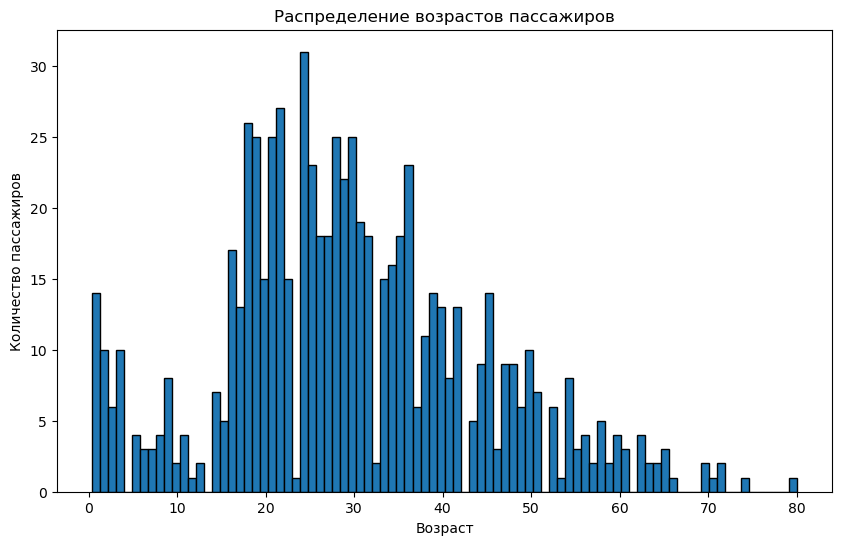

In [161]:
import matplotlib.pyplot as plt

data_cleaned = data.dropna(subset=['Age'])

plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['Age'], bins=88, edgecolor='black')

plt.title('Распределение возрастов пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')

plt.show()


2. Постройте гистограммы распределения цен для пассажиров разных классов

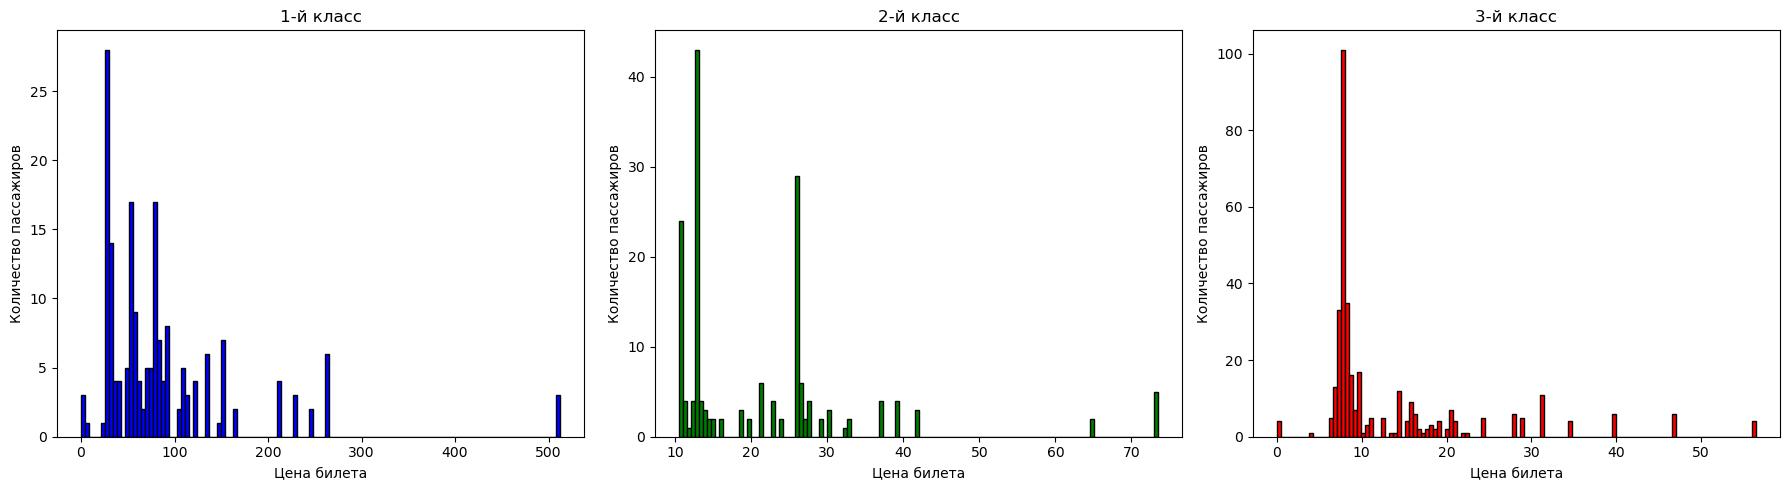

In [162]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(data_cleaned[data_cleaned['Pclass'] == 1]['Fare'], bins=120, edgecolor='black', color='blue')
plt.title('1-й класс')
plt.xlabel('Цена билета')
plt.ylabel('Количество пассажиров')

plt.subplot(1, 3, 2)
plt.hist(data_cleaned[data_cleaned['Pclass'] == 2]['Fare'], bins=120, edgecolor='black', color='green')
plt.title('2-й класс')
plt.xlabel('Цена билета')
plt.ylabel('Количество пассажиров')

plt.subplot(1, 3, 3)
plt.hist(data_cleaned[data_cleaned['Pclass'] == 3]['Fare'], bins=120, edgecolor='black', color='red')
plt.title('3-й класс')
plt.xlabel('Цена билета')
plt.ylabel('Количество пассажиров')

plt.tight_layout()
plt.show()


3. Постройте зависимость цены от возраста пассажира

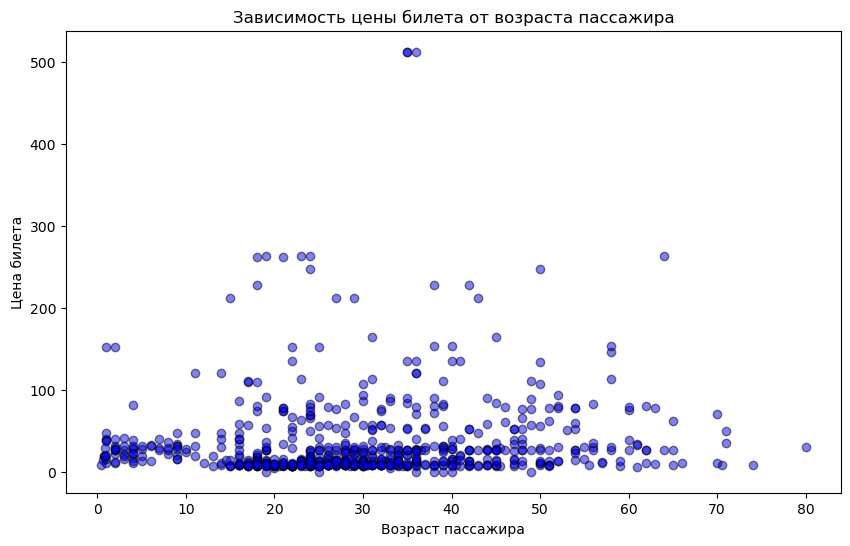

In [163]:
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Age'], data_cleaned['Fare'], alpha=0.5, color='blue', edgecolors='black')

plt.title('Зависимость цены билета от возраста пассажира')
plt.xlabel('Возраст пассажира')
plt.ylabel('Цена билета')

plt.show()


4. Постройте box plot отображающий распределение цен на билеты в разных классах

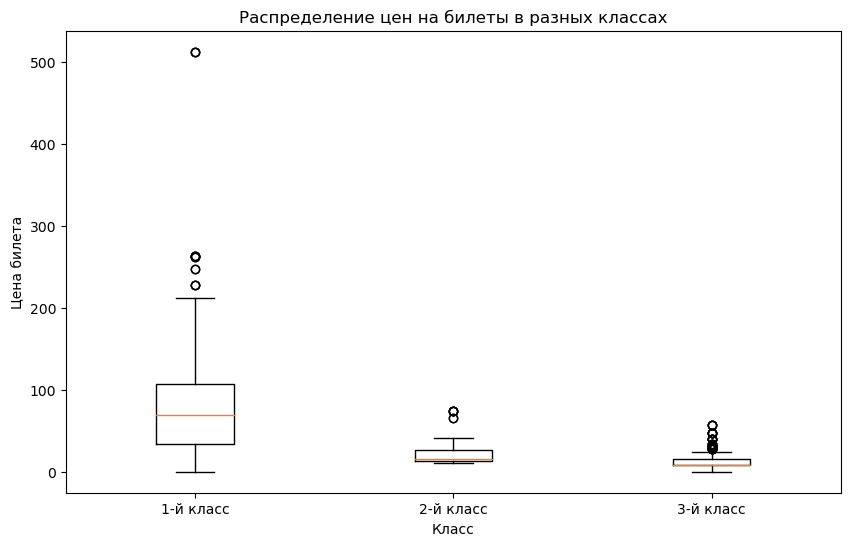

In [164]:
plt.figure(figsize=(10, 6))
plt.boxplot([data_cleaned[data_cleaned['Pclass'] == 1]['Fare'],
             data_cleaned[data_cleaned['Pclass'] == 2]['Fare'],
             data_cleaned[data_cleaned['Pclass'] == 3]['Fare']],
            labels=['1-й класс', '2-й класс', '3-й класс'])

plt.title('Распределение цен на билеты в разных классах')
plt.xlabel('Класс')
plt.ylabel('Цена билета')

plt.show()


5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

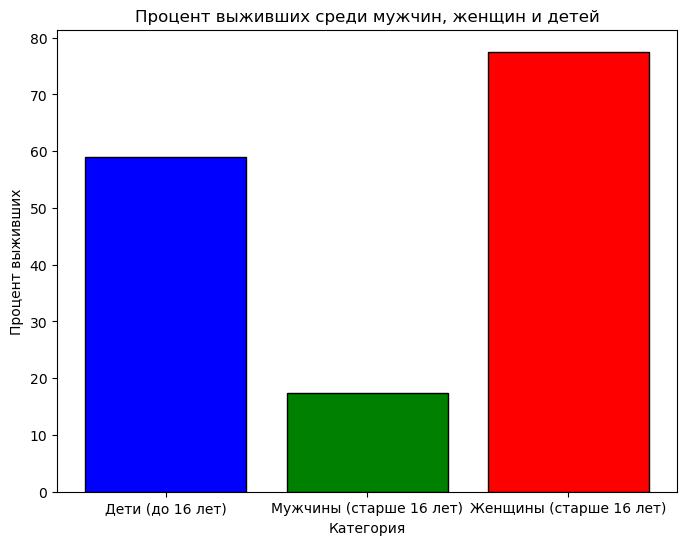

In [165]:
data_cleaned = data_cleaned.dropna(subset=['Sex', 'Survived'])

children_survived = data_cleaned[(data_cleaned['Age'] < 16) & (data_cleaned['Survived'] == 1)].shape[0] / data_cleaned[data_cleaned['Age'] < 16].shape[0] * 100

men_survived = data_cleaned[(data_cleaned['Age'] >= 16) & (data_cleaned['Sex'] == 'male') & (data_cleaned['Survived'] == 1)].shape[0] / data_cleaned[(data_cleaned['Age'] >= 16) & (data_cleaned['Sex'] == 'male')].shape[0] * 100

women_survived = data_cleaned[(data_cleaned['Age'] >= 16) & (data_cleaned['Sex'] == 'female') & (data_cleaned['Survived'] == 1)].shape[0] / data_cleaned[(data_cleaned['Age'] >= 16) & (data_cleaned['Sex'] == 'female')].shape[0] * 100

plt.figure(figsize=(8, 6))
categories = ['Дети (до 16 лет)', 'Мужчины (старше 16 лет)', 'Женщины (старше 16 лет)']
survival_rates = [children_survived, men_survived, women_survived]

plt.bar(categories, survival_rates, color=['blue', 'green', 'red'], edgecolor='black')

plt.title('Процент выживших среди мужчин, женщин и детей')
plt.xlabel('Категория')
plt.ylabel('Процент выживших')

plt.show()


6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

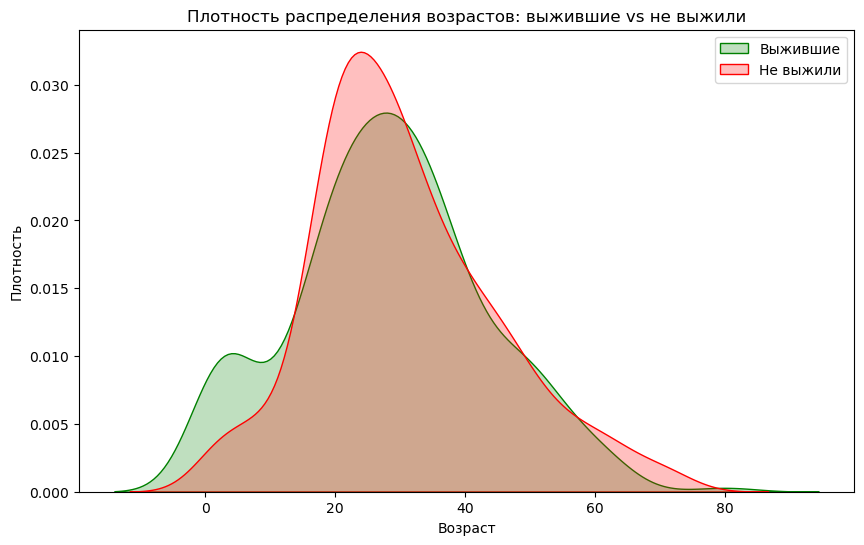

In [168]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.kdeplot(data_cleaned[data_cleaned['Survived'] == 1]['Age'], label='Выжившие', fill=True, color='green')

sns.kdeplot(data_cleaned[data_cleaned['Survived'] == 0]['Age'], label='Не выжили', fill=True, color='red')

plt.title('Плотность распределения возрастов: выжившие vs не выжили')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()

plt.show()


# Локальный зеленый пик слева и и плотность красного распределения, близкая к нормальному свидетельствуют о том, что людей меньшего возраста
# были большие шансы на выживание, чем у взрослых. Это может символизировать то, что сначала спасали детей, потом всех отсальных.


7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

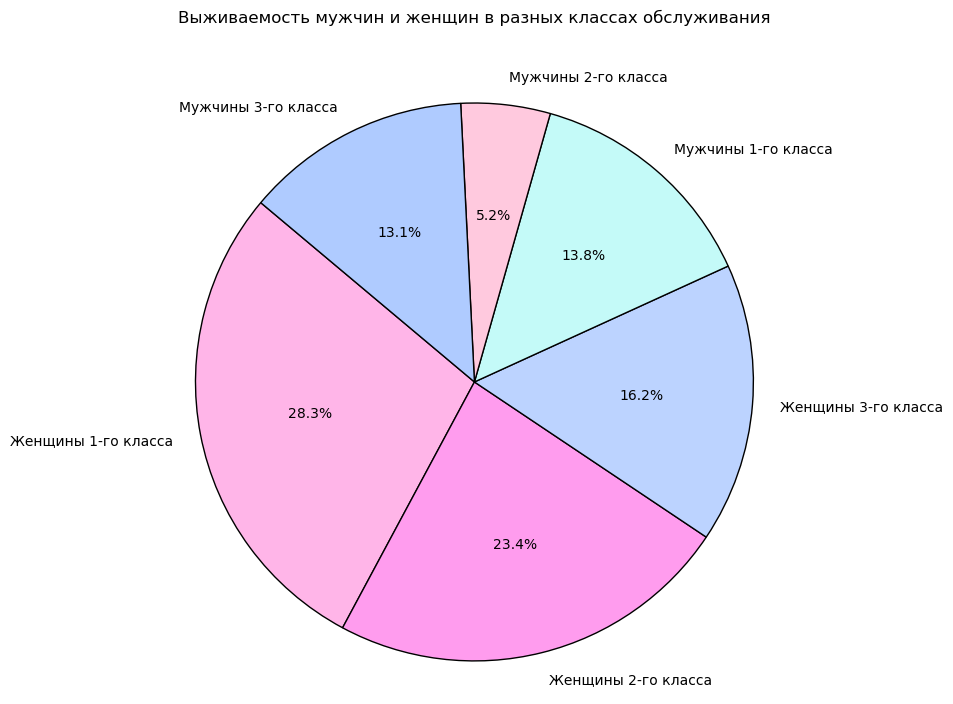

In [167]:
survived_women_class1 = data_cleaned[(data_cleaned['Sex'] == 'female') & (data_cleaned['Pclass'] == 1) & (data_cleaned['Survived'] == 1)].shape[0]
survived_women_class2 = data_cleaned[(data_cleaned['Sex'] == 'female') & (data_cleaned['Pclass'] == 2) & (data_cleaned['Survived'] == 1)].shape[0]
survived_women_class3 = data_cleaned[(data_cleaned['Sex'] == 'female') & (data_cleaned['Pclass'] == 3) & (data_cleaned['Survived'] == 1)].shape[0]

survived_men_class1 = data_cleaned[(data_cleaned['Sex'] == 'male') & (data_cleaned['Pclass'] == 1) & (data_cleaned['Survived'] == 1)].shape[0]
survived_men_class2 = data_cleaned[(data_cleaned['Sex'] == 'male') & (data_cleaned['Pclass'] == 2) & (data_cleaned['Survived'] == 1)].shape[0]
survived_men_class3 = data_cleaned[(data_cleaned['Sex'] == 'male') & (data_cleaned['Pclass'] == 3) & (data_cleaned['Survived'] == 1)].shape[0]

labels = ['Женщины 1-го класса', 'Женщины 2-го класса', 'Женщины 3-го класса',
          'Мужчины 1-го класса', 'Мужчины 2-го класса', 'Мужчины 3-го класса']

sizes = [survived_women_class1, survived_women_class2, survived_women_class3,
         survived_men_class1, survived_men_class2, survived_men_class3]

colors = ['#ffb5e8','#ff9cee','#bcd3ff','#c4faf8', '#ffc9de', '#afcbff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Выживаемость мужчин и женщин в разных классах обслуживания', pad=40)
plt.axis('equal')

plt.show()
